In [ ]:
import logging

from pyannote.audio import Pipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook
from pyannote.core.timeline import Timeline


class SpeakerIdentifier:
    def __init__(self):
        self.hf_token = ' '
        self.model_name = "pyannote/speaker-diarization-3.1"
        self.min_speakers = 1
        self.max_speakers = 5
        self.pipeline = None

        self._load_pipeline()

    def _load_pipeline(self):
        try:
            logging.info(f"Loading speaker diarization model ({self.model_name})")
            self.pipeline = Pipeline.from_pretrained(self.model_name,
                                                use_auth_token=self.hf_token)
        except Exception as e:
            logging.error(f"Failed to load model: {e}")
            raise

    def identify_speakers(self, audio_file):
        with ProgressHook() as hook:
            diarization = self.pipeline(audio_file, 
                                        hook=hook,
                                        min_speakers=self.min_speakers, 
                                        max_speakers=self.max_speakers)
        return diarization

/opt/anaconda3/envs/safevision/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s = SpeakerIdentifier()
res = s.identify_speakers('data/4.wav')

/opt/anaconda3/envs/safevision/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/opt/anaconda3/envs/safevision/lib/python3.10/site-packages/pyannote/audio/models/blocks/pooling.py:104: 
UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input
numel divided by output numel). (Triggered internally at 
/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1839.)
  std = sequences.std(dim=-1, correction=1)

/opt/anaconda3/envs/safevision/lib/python3.10/site-packages/torchaudio/_backend/soundfile_backend.py:71: 
UserWarning: The OPUS subtype is unknown to TorchAudio. As a result, the bits_per_sample attribute will be set to 
0. If you are seeing this warning, please report by opening an issue on github (after checking for existing/closed 
ones). You may otherwise ignore this warning.
  warnings.warn(

/opt/anaconda3/envs/safevision/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[ 00:00:00.655 -->  00:00:02.393] A SPEAKER_00
[ 00:00:02.612 -->  00:00:04.435] B SPEAKER_01
[ 00:00:05.228 -->  00:00:06.983] C SPEAKER_00
[ 00:00:07.388 -->  00:00:07.945] D SPEAKER_01


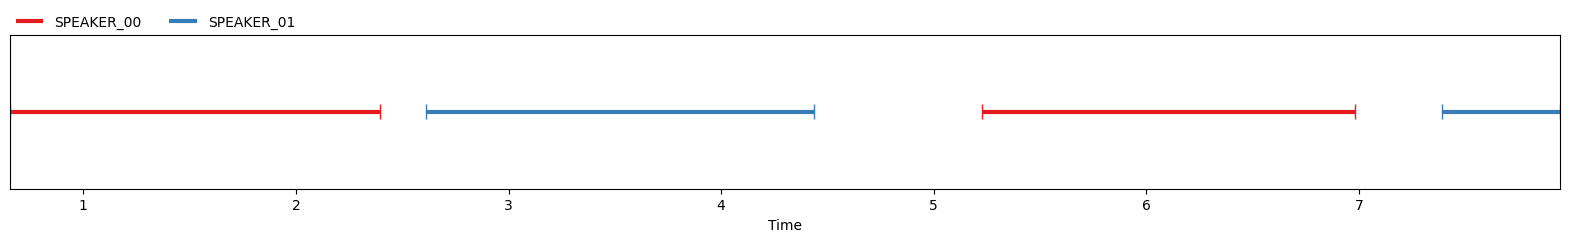

In [6]:
print(res)
res

In [14]:
print(list(res.itertracks())[0])

(<Segment(0.655344, 2.39347)>, 'A')


In [22]:
for s in res.itersegments():
    print(s.start, s.end)

0.65534375 2.3934687500000003
2.61284375 4.4353437499999995
5.228468750000001 6.98346875
7.388468750000001 7.945343750000001


In [19]:
for segment, track, label in res.itertracks(yield_label=True):
    print(segment, track, label)

[ 00:00:00.655 -->  00:00:02.393] A SPEAKER_00
[ 00:00:02.612 -->  00:00:04.435] B SPEAKER_01
[ 00:00:05.228 -->  00:00:06.983] C SPEAKER_00
[ 00:00:07.388 -->  00:00:07.945] D SPEAKER_01
